In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from utils import get_file_data, get_config

In [2]:
file_path = '../output/state/'
files = sorted(os.listdir(file_path))
print(files)


['critical_prob=0.0&num_states=1&num_tasks=15&period=[10, 100]&task_max_utilization=0.2.txt', 'critical_prob=0.0&num_states=11&num_tasks=15&period=[10, 100]&task_max_utilization=0.2.txt', 'critical_prob=0.0&num_states=3&num_tasks=15&period=[10, 100]&task_max_utilization=0.2.txt', 'critical_prob=0.0&num_states=5&num_tasks=15&period=[10, 100]&task_max_utilization=0.2.txt', 'critical_prob=0.0&num_states=7&num_tasks=15&period=[10, 100]&task_max_utilization=0.2.txt', 'critical_prob=0.0&num_states=9&num_tasks=15&period=[10, 100]&task_max_utilization=0.2.txt', 'critical_prob=0.1&num_states=1&num_tasks=15&period=[10, 100]&task_max_utilization=0.2.txt', 'critical_prob=0.1&num_states=11&num_tasks=15&period=[10, 100]&task_max_utilization=0.2.txt', 'critical_prob=0.1&num_states=3&num_tasks=15&period=[10, 100]&task_max_utilization=0.2.txt', 'critical_prob=0.1&num_states=5&num_tasks=15&period=[10, 100]&task_max_utilization=0.2.txt', 'critical_prob=0.1&num_states=7&num_tasks=15&period=[10, 100]&task_

In [3]:
cfg = get_config('../cfg/state_exp_cfg.json')
state_less = {}
state_wise = {}

critical_prob_list = cfg['critical_prob_list']

for state_num in cfg['num_states_list'] :
    state_less[str(state_num)] = [ 0 ] * len(critical_prob_list)
    state_wise[str(state_num)] = [ 0 ] * len(critical_prob_list)

In [4]:
critical_prob_index = {str(p): i for i, p in enumerate(critical_prob_list)}

for file in files :
    if not file.endswith('.txt') :
        continue
    _params = [p.split('=') for p in file[:-4].split('&')]
    params = {k: v for k, v in _params}
    data = get_file_data(file_path + file).split('\n')
    num_states = params['num_states']
    critical_prob = params['critical_prob']

    for line in data :
        if line == '' :
            continue
        less, wise = [int(l) for l in line.split(',')]
        state_less[num_states][critical_prob_index[critical_prob]] += less
        state_wise[num_states][critical_prob_index[critical_prob]] += wise

In [5]:
num_task_sets = cfg['num_task_sets']

for k, v in state_less.items() :
    state_less[k] = [l / num_task_sets for l in v]

for k, v in state_wise.items() :
    state_wise[k] = [l / num_task_sets for l in v]

print(state_less)
print(state_wise)

{'1': [3.978, 4.212, 4.442, 4.722, 5.086, 5.51, 5.798, 6.23, 6.812, 7.414, 8.294], '3': [3.964, 4.758, 5.392, 6.1, 6.652, 7.178, 7.828, 7.968, 8.214, 8.294, 8.232], '5': [4.0, 5.104, 6.048, 7.038, 7.69, 8.056, 8.098, 8.172, 8.208, 8.354, 8.252], '7': [3.99, 5.502, 6.8, 7.5, 8.16, 8.306, 8.26, 8.304, 8.326, 8.31, 8.116], '9': [4.012, 5.896, 7.172, 8.174, 8.15, 8.228, 8.33, 8.378, 8.2, 8.348, 8.284], '11': [3.99, 6.238, 7.6, 8.04, 8.178, 8.266, 8.184, 8.252, 8.298, 8.274, 8.274]}
{'1': [3.978, 4.212, 4.442, 4.722, 5.086, 5.51, 5.798, 6.23, 6.812, 7.414, 8.294], '3': [3.964, 4.4, 4.932, 5.404, 5.728, 6.046, 6.72, 7.11, 7.808, 8.414, 8.232], '5': [4.0, 4.474, 5.114, 5.624, 6.072, 6.548, 7.01, 7.698, 8.104, 8.676, 8.252], '7': [3.99, 4.656, 5.242, 5.708, 6.302, 6.864, 7.31, 7.816, 8.454, 8.766, 8.116], '9': [4.012, 4.774, 5.304, 5.988, 6.274, 6.922, 7.472, 8.144, 8.5, 8.858, 8.284], '11': [3.99, 4.772, 5.482, 5.976, 6.412, 7.07, 7.518, 8.1, 8.668, 8.896, 8.274]}


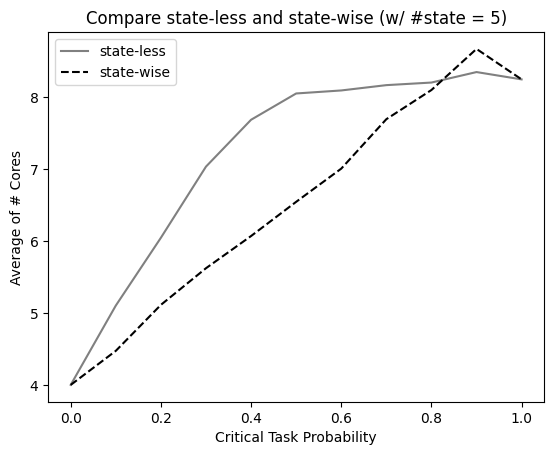

In [6]:
# Compare state-wise and state-less with criticality probability (#state = 5)

plt.plot(critical_prob_list, state_less['5'], label='state-less', color='gray')
plt.plot(critical_prob_list, state_wise['5'], label='state-wise', color='black', linestyle='dashed')

plt.title('Compare state-less and state-wise (w/ #state = 5)')
plt.xlabel('Critical Task Probability')
plt.ylabel('Average of # Cores')
plt.legend()
plt.show()

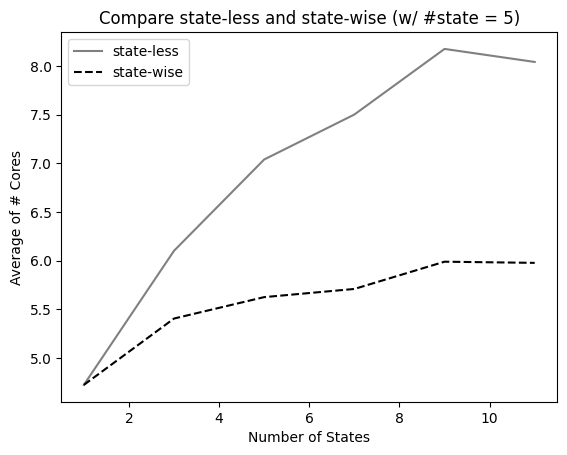

In [7]:
# Compare state-wise and state-less with #states (#critical_prob = 0.3)

index = critical_prob_index['0.3']
state_list = cfg['num_states_list']

def get_state_list(output_dict, index) :
    return [output_dict[str(s)][index] for s in state_list]

plt.plot(state_list, get_state_list(state_less, index), label='state-less', color='gray')
plt.plot(state_list, get_state_list(state_wise, index), label='state-wise', color='black', linestyle='dashed')

plt.title('Compare state-less and state-wise (w/ #state = 5)')
plt.xlabel('Number of States')
plt.ylabel('Average of # Cores')
plt.legend()
plt.show()